In [ ]:
import numpy as np
import matplotlib.pyplot as plt

/shared-libs/python3.7/py/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/shared-libs/python3.7/py/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


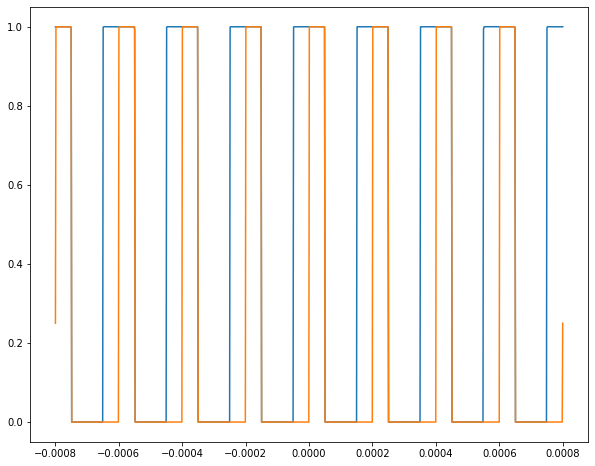

In [ ]:
@np.vectorize
def fourier_series(x,a,I=1,N=9,modifier = {}):
    F0 = 1/2*I
    k = 2*np.pi/a
    
    if N%2 == 0:
        N += 1
        
    
    n = np.arange(-N,N+2,2)
    mod = np.ones(len(n))
    

    power = np.where((abs(n)+1)%4 == 0, [1],[0])
    #this gets the sign right
    sign = (-1)**power
    coef = sign/(abs(n)*np.pi)

    for key in modifier.keys():
        i = np.where(n == int(key))
        
        coef[i] = modifier[key]
        if key == '0':
            F0 = modifier[key]
        
    
    
    fourier_series = F0 + np.sum(coef*np.exp(-1j*n*k*x))
    return fourier_series


# @np.vectorize
# def duty_cycle_fourier(x,a,d,I=1,N=9, modifier = {}):
#     F0 = d*I
#     k = 2*np.pi/a
    
#     n = np.arange(1,N+1,1)
#     #remove the zero
#     #n = np.delete(n, len(n)//2)
    
#     mod = np.ones(len(n))
#     for key in modifier.keys():
#         i = np.where(n == int(key))
        
#         coef[i] = modifier[key]
#         if key == '0':
#             F0 = modifier[key]
    
#     fourier_series = F0 + 1/np.pi*np.sum(1/n*np.sin(2*n*np.pi*d)*np.cos(n*k*x)) + 1/np.pi*np.sum(1/n*np.sin(n*k*x)*(1-np.cos(2*n*np.pi*d)))
#     return fourier_series


def intensity(x,a,I=1,N=9,modifier = {}):
    y = fourier_series(x,a,I=I,N=N,modifier = modifier)
    return y*np.conj(y)

def intensity_duty(x,a,d,I=1,N=9,modifier = {}):
    y = duty_cycle_fourier(x,a,d, I = I, N = N, modifier = modifier)
    return y*np.conj(y)

@np.vectorize
def duty_cycle_fourier(x,a,d,I=1,N=9, modifier = {}):
    F0 = d*I
    k = 2*np.pi/a
    
    n = np.arange(-N,N+1,1)
    #remove the zero
    n = np.delete(n,len(n)//2)
    mod = np.ones(len(n))
    

    for key in modifier.keys():
        i = np.where(n == int(key))
        
        n[i] = modifier[key]
        if key == '0':
            F0 = modifier[key]
        

    fourier_series = F0 - 1j/(2*np.pi)*np.sum(1/n*(1-np.exp(-1j*2*np.pi*n*d))*np.exp(1j*n*k*x))
    return fourier_series


a = 0.2e-3
x_min = -4*a
x_max = 4*a
xspace = np.linspace(x_min,x_max,1000)
yspace = intensity(xspace,a,N=20001)
yspace2 = intensity_duty(xspace,a,1/4,N=37000)

fig = plt.figure(figsize = (10,8))
plt.plot(xspace,yspace)
plt.plot(xspace,yspace2)



# d)

/shared-libs/python3.7/py/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


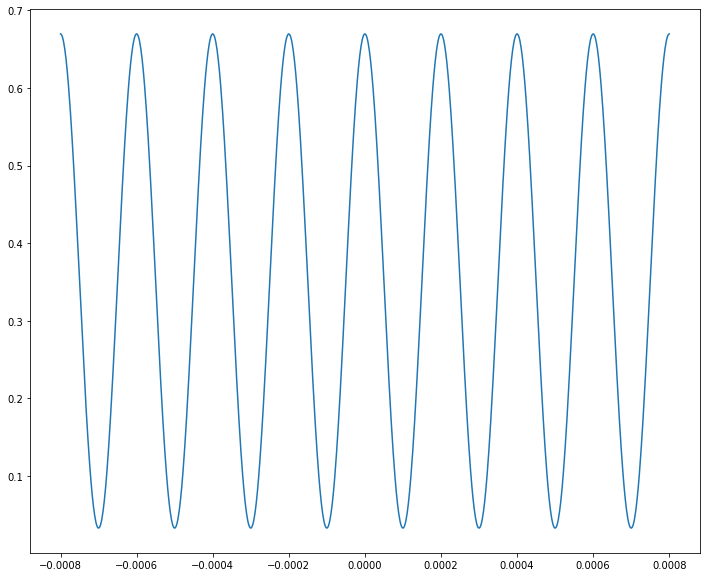

In [ ]:
a = 0.2e-3
x_min = -4*a
x_max = 4*a
xspace = np.linspace(x_min,x_max,1000)
yspace = intensity(xspace,a,N=1, modifier = {'-1':0})


fig = plt.figure(figsize = (12,10))
plt.plot(xspace,yspace)

# e)

/shared-libs/python3.7/py/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


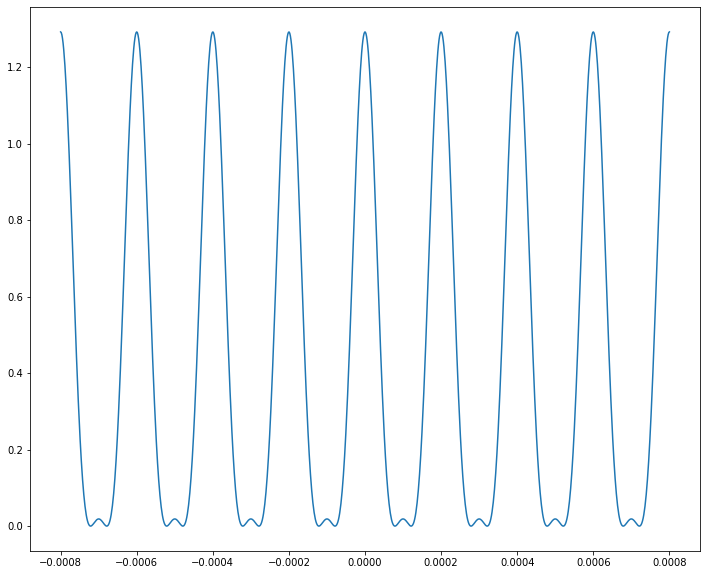

In [ ]:
a = 0.2e-3
x_min = -4*a
x_max = 4*a
xspace = np.linspace(x_min,x_max,1000)
yspace = intensity(xspace,a,N=1)


fig = plt.figure(figsize = (12,10))
plt.plot(xspace,yspace)

# f)

/shared-libs/python3.7/py/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


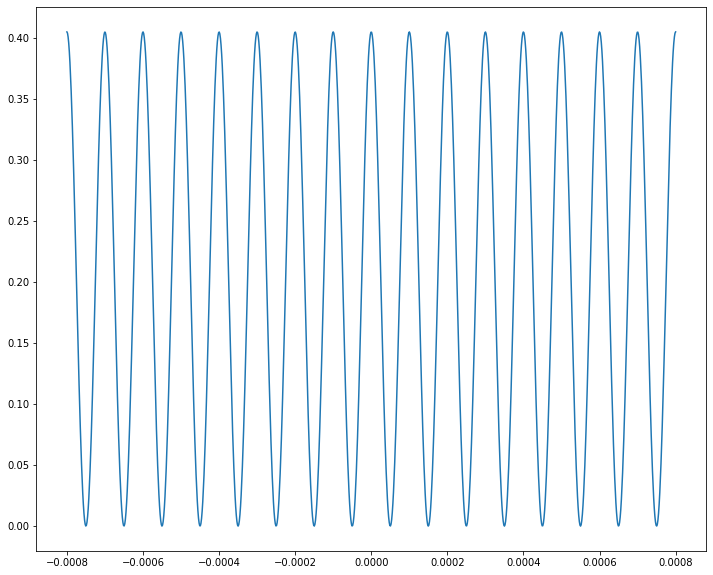

In [ ]:
a = 0.2e-3
x_min = -4*a
x_max = 4*a
xspace = np.linspace(x_min,x_max,1000)
yspace = intensity(xspace,a,N=1, modifier={'0':0})


fig = plt.figure(figsize = (12,10))
plt.plot(xspace,yspace)

/shared-libs/python3.7/py/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


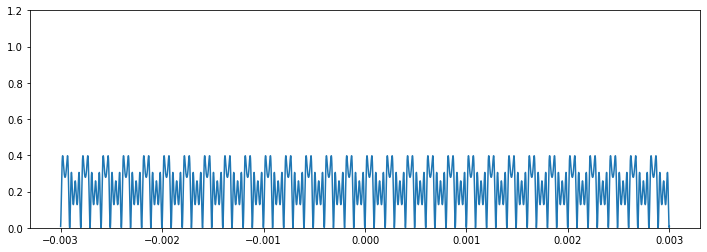

In [ ]:
a = 0.2e-3
x_min = -15*a
x_max = 15*a
xspace = np.linspace(x_min,x_max,100000)
yspace = intensity_duty(xspace,a,0.437,N=5, modifier = {'0' : 0})

fig = plt.figure(figsize = (12,4))
plt.ylim(0,1.2)
plt.plot(xspace,yspace)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d5fa1824-1bb4-43c9-8e7a-6904bae8e065' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>